In [1]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt 
from itertools import chain
import seaborn as sns
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
yourpath = r"C:\Users\User\Documents\visualizatiion hw\babynames"

In [3]:
directory = list()

for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        directory.append(os.path.join(root, name))
        ##print(os.path.join(root, name))

directory = directory[1:]

dfc = pd.DataFrame(columns=['Name','Sex','Amount','Year'])

for i in directory:
    df = pd.read_csv(i,names=['Name','Sex','Amount'], delimiter=',' )
    df['Year'] = i
    df['Year'] = df['Year'].map(lambda x: x.lstrip(r'C:\Users\User\Documents\visualizatiion hw\babynames\yob').rstrip('.txt'))
    dfc = dfc.append(df)

In [5]:
dfc.head()

,Name,Sex,Amount,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


# ЗАДАНИЕ 1: Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

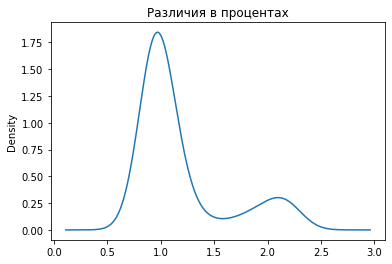

In [6]:
Sex_group = dfc.groupby(['Year', 'Sex']).sum()
Sex_group = Sex_group[['Amount']]
pivot_year = dfc.pivot_table('Amount', index='Year',
                             columns = 'Sex', aggfunc=sum)
pivot_year['delim'] = pivot_year['F'] / pivot_year['M']
pivot_year['delim'].plot(kind='kde', title = 'Различия в процентах')

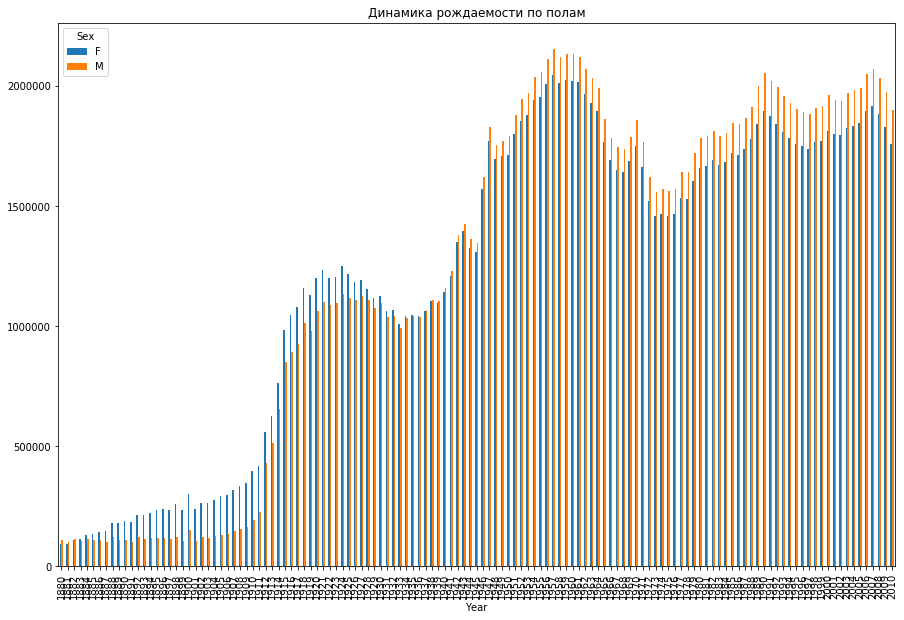

In [7]:
pivot_year[['F','M']].plot(kind = 'bar',figsize = (15,10), title = 'Динамика рождаемости по полам', legend=True, use_index=True)

# Задание №2: Найти самые популярные имена за всю историю.

In [15]:
#pivot_name = dfc.pivot_table('Amount',
#                             index='Year',
#                             columns = 'Name',
#                             aggfunc=sum)
#pivot_name.fillna(0)
#pivot_name = pivot_name.T
#pivot_name_correct = pivot_name.fillna(0)
#pivot_name_correct['Sum'] = pivot_name_correct.sum(axis=1)
#Main_data = pd.DataFrame(pivot_name_correct['Sum'])
#Main_data.sort_values(by = 'Sum',ascending = False,inplace = True)
#top_5_M = Main_data['Sum'].head()
#top_5_M.plot(kind = 'barh')

In [11]:
#df_top = df_top.groupby(['Name']).max()
#df_top = df_top.sort_values(['Amount'],ascending = False)

In [8]:
group = dfc.groupby(['Name','Year'])

In [9]:
max_data = group['Amount'].max()

In [20]:
dfm = pd.DataFrame(max_data)

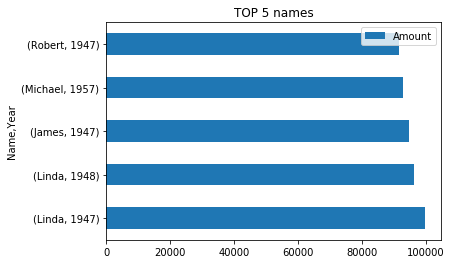

In [33]:
dfm.sort_values(['Amount'],ascending = False).head().plot(kind = 'barh',title='TOP 5 names')

# Задание№3 Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время

In [51]:
year_interval = dfc['Year'].nunique() // 10
years = np.arange(1880, 2010, year_interval )
new_df = dfc.reset_index()
new_df['Year'] = pd.to_numeric(new_df['Year'])
new_df = new_df.loc[0:1690779]
#np.unique(new_df['Year']) #Все года есть 

In [52]:
date_index = np.repeat(years,169078)
new_df.sort_values(by='Year', ascending=True, inplace = True)
new_df['date_index'] = date_index

In [54]:
new_df.head()

,index,Name,Sex,Amount,Year,date_index
0,0,Mary,F,7065,1880,1880
1341,1341,Vern,M,19,1880,1880
1340,1340,Stewart,M,19,1880,1880
1339,1339,Randolph,M,19,1880,1880
1338,1338,Lucien,M,19,1880,1880


In [93]:
group_10 = new_df.groupby(['date_index'])

In [94]:
group_10['Amount'].max()

date_index
1880    67375
1893    73980
1906    99651
1919    92700
1932    85298
1945    68713
1958    65384
1971    41396
1984    32509
1997    24797
Name: Amount, dtype: int64

In [98]:
group_10_new = new_df.groupby(['date_index','Name']).agg({'Amount':'max'})

In [101]:
group_10_new.head()

Amount
date_index Name         
1880       Aage        7
           Aagot       5
           Aarne       5
           Aaron     656
           Ab          8

In [ ]:
#SELECT FID_preproc, MAX(Shape_Area)
#FROM table 
#GROUP BY FID_preproc

In [106]:
dc = new_df.groupby(['date_index','Name'], as_index=True)['Amount'].max()

In [ ]:
# я сдался

#  Задание 4 Для каждого года рассчитайте сколько имен покрывают 50% людей,визуализируйте (мы увидим разнообразие имен за каждый год)

In [108]:
year = dfc.Year.unique()

In [109]:
meds = {}
for i in year:
    iss = dfc[dfc['Year'] == i]
    med = iss['Amount'].median()
    meds.update({i:med})

In [111]:
below_med = {}
for i in year:
    a = dfc[dfc['Year'] == i]
    b = a[a['Amount']<meds[i]]
    c = int(b['Name'].count())
    below_med.update({i:c})

In [112]:
fg = plt.figure(figsize=(25,25))
x = list(below_med.keys())
y = list(below_med.values())

<Figure size 1800x1800 with 0 Axes>

TypeError: 'str' object is not callable

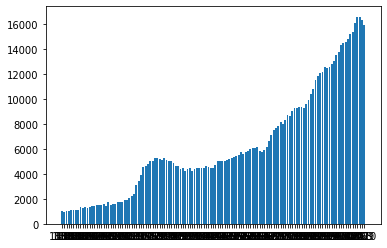

In [123]:
fg.add_subplot(111)
plt.bar(x,y)
plt.title('Сколько меньше медианы')
plt.ylabel('кол-во имен')
plt.xlabel('год')
#plt.legend()


не понимаю в чем проблема тайтла...

# Задание 5. Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени

Первые буквы

In [124]:
ma_fd = dfc[dfc['Year'] == i]
ma_humps=list(ma_fd['Name'])
letter = []
for k in ma_humps:
    cv = k[0]
    letter.append(cv)
c = Counter(letter)
c = dict(c)
c = pd.DataFrame([c],index = [i])
c.reset_index(inplace=True)
c

,index,A,B,C,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,2010,4379,1344,1734,2038,1396,363,685,772,588,...,109,1532,2322,1717,69,343,217,108,601,880


In [125]:
year_4 = ['1880','1890','1895','1899']
ma_fd = dfc[dfc['Year'] == '1880']
dsa = {}
for i in year_4:
    ma_fd = dfc[dfc['Year'] == i]
    ma_humps=list(ma_fd['Name'])
    letter = []
    for k in ma_humps:
        cv = k[0]
        letter.append(cv)
    c = Counter(letter)
    c = dict(c)
    c = pd.DataFrame([c],index = [i])
    dsa.update({i:c})

In [126]:
count_data = dsa['1880'].append(dsa['1890']).append(dsa['1895']).append(dsa['1899']).T

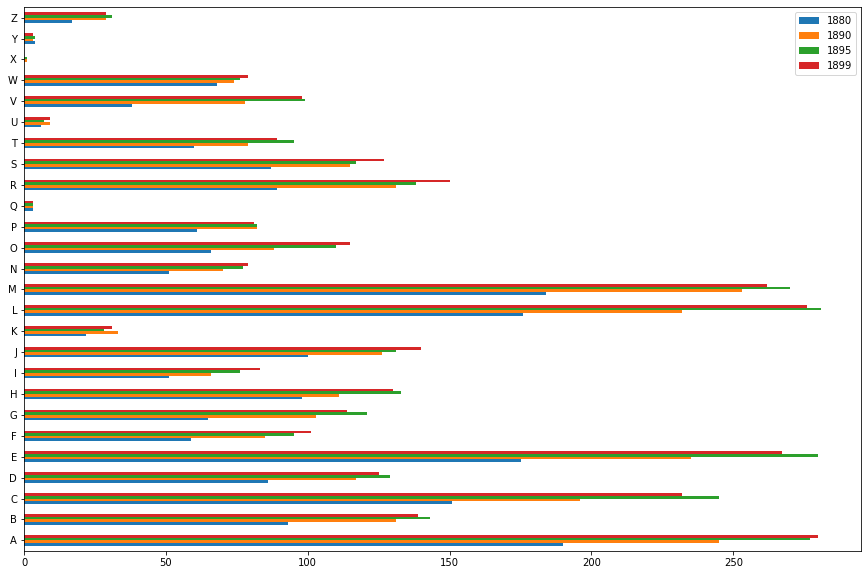

In [127]:
count_data.plot(kind='barh',figsize=(15,10))

Последние буквы

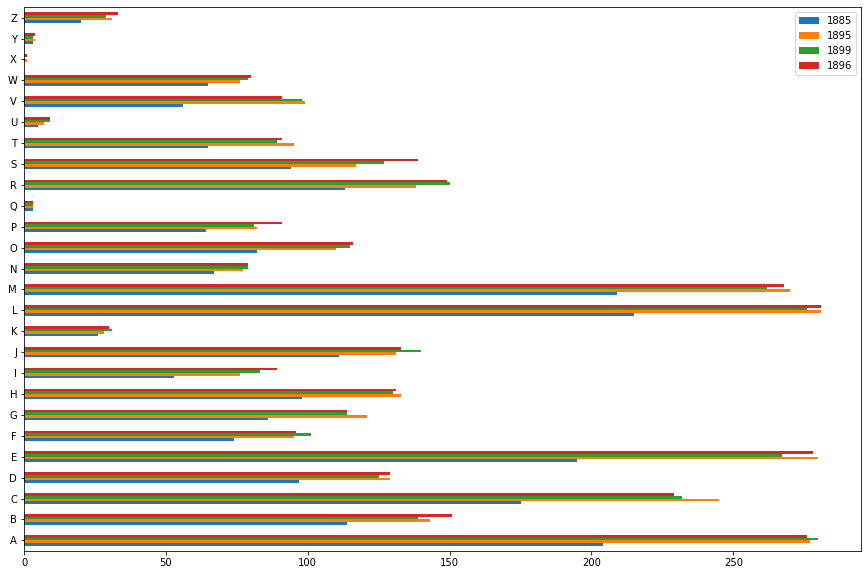

In [128]:
ma_fd = dfc[dfc['Year'] == i]
ma_humps=list(ma_fd['Name'])
letter = []
for k in ma_humps:
    cv = k[-1]
    letter.append(cv)
c = Counter(letter)
c = dict(c)
c = pd.DataFrame([c],index = [i])
c.reset_index(inplace=True)
year_4 = ['1885','1895','1899','1896']
dsa = {}
for i in year_4:
    ma_fd = dfc[dfc['Year'] == i]
    ma_humps=list(ma_fd['Name'])
    letter = []
    for k in ma_humps:
        cv = k[0]
        letter.append(cv)
    c = Counter(letter)
    c = dict(c)
    c = pd.DataFrame([c],index = [i])
    dsa.update({i:c})
count_data = dsa['1885'].append(dsa['1895']).append(dsa['1899']).append(dsa['1896']).T
count_data.plot(kind='barh',figsize=(15,10))

Интересный факт, что можно наблюдать прямую реализацию закона больших чисел

# Задание 6. Составьте список из нескольких известных людей (президенты, певцы, актеры,киногерои) и оцените их влияние на динамику имен, постройте наглядную визуализацию

In [129]:
fam = ['Jackson', 'Christopher','David']

In [130]:
ma_table = dfc[(np.isin(dfc['Name'], fam))&(dfc['Sex'] == 'M')]

In [131]:
ma_table.head()

,Name,Sex,Amount,Year
959,David,M,869,1880
1083,Christopher,M,95,1880
1188,Jackson,M,46,1880
955,David,M,750,1881
1110,Christopher,M,68,1881


In [132]:
pivko = pd.pivot_table(data = ma_table, index = ma_table['Year'], columns = ma_table['Name'], aggfunc = np.sum)

In [133]:
df_с = pivko['Amount']

Text(0.5, 1.0, '3 популярных имени')

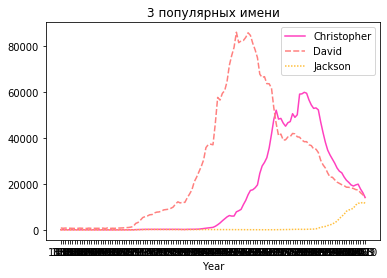

In [135]:
sns.lineplot(data = df_с,palette = 'spring').set_title('3 популярных имени')

Нужно добавить годы жизни популярных людей, легче всего это сделать с Джексоном

In [137]:
Jack_b = '1958-01-01'
Jack_d = '2009-01-01'

In [156]:
bs =pd.date_range(start = Jack_b
              ,end = Jack_d, freq='Y')#.tolist()

In [157]:
bs = pd.DataFrame(bs)

In [158]:
bs['Year'] = pd.DatetimeIndex(bs[0]).year

In [159]:
a = np.arange(1880,2010)
b = list(bs['Year'])

#я пытался и не понимаю как это сдлеать просьба подсказать
